<a href="https://colab.research.google.com/github/Aban6/Data-Visualization_LineCharts/blob/main/2022_CA_Winter_Demand_and_Renewables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#autosaving the notebook
%autosave 60

Autosaving every 60 seconds


In [2]:
#upload the file
from google.colab import files

# Choose a file from your local machine to upload
uploaded = files.upload()


Saving W_netLoadANDRenewables2022.csv to W_netLoadANDRenewables2022 (1).csv


In [3]:
#read csv file and create a dataframe
import pandas as pd

# Replace 'your_file.csv' with the actual filename you uploaded
file_name = 'W_netLoadANDRenewables2022.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()
df.shape

(744, 17)

In [4]:
# Drop one or more columns by specifying their names
df = df.drop(['INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT', 'SLRS_TYPE', 'OPR_INTERVAL', 'MARKET_RUN_ID','TAC_ZONE_NAME','SCHEDULE','XML_DATA_ITEM','POS','MW','GROUP'], axis=1)


In [5]:
#fill na
df=df.fillna(0)
#shape
df.shape


(744, 6)

In [6]:
# Display the first few rows of the DataFrame
df.head()

,OPR_DT,OPR_HR,RE,Net MW,% RE,SRMER
0,1/1/2022,1,2375.16,19179.52,11.019231,410.430839
1,1/1/2022,2,2073.34,18745.34,9.959037,416.326531
2,1/1/2022,3,1769.54,18543.45,8.711371,422.146636
3,1/1/2022,4,1487.15,18534.29,7.427787,416.402116
4,1/1/2022,5,1118.79,18884.42,5.593052,413.227513


In [7]:
# Assuming your DataFrame is already loaded with columns 'Date' and 'Hour'
# Combine 'Date' and 'Hour' columns into a single string column
df['Datetime_Str'] = df['OPR_DT'] + ' ' + df['OPR_HR'].astype(str)

# Apply the custom parser to create the adjusted datetime column
df['Datetime'] = df['Datetime_Str']

# Drop the temporary string column
df.drop(columns=['Datetime_Str'], inplace=True)

In [8]:
# You want to keep rows from index 336 to 504 (inclusive)
start_index = 336
end_index = 504

# Select the desired range of rows and create a new DataFrame
new_df = df.iloc[start_index:end_index + 1]  # Adding 1 to include the end_index row

df=new_df
df

,OPR_DT,OPR_HR,RE,Net MW,% RE,SRMER,Datetime
336,1/15/2022,1,733.17,19984.12,3.538928,409.221466,1/15/2022 1
337,1/15/2022,2,738.97,19145.74,3.716272,407.634165,1/15/2022 2
338,1/15/2022,3,719.54,18692.08,3.706749,404.346183,1/15/2022 3
339,1/15/2022,4,682.43,18523.56,3.553214,400.944822,1/15/2022 4
340,1/15/2022,5,655.63,18624.28,3.400586,402.721088,1/15/2022 5
...,...,...,...,...,...,...,...
500,1/21/2022,21,1964.90,23218.16,7.802467,435.941043,1/21/2022 21
501,1/21/2022,22,1987.55,22152.98,8.233249,432.690854,1/21/2022 22
502,1/21/2022,23,1981.45,20773.55,8.707757,426.984127,1/21/2022 23
503,1/21/2022,24,1977.91,19381.57,9.260104,407.369615,1/21/2022 24


In [9]:
# Check for missing data points (NaN) or zero values in the 'Hour' column
missing_data = df[df['Datetime'].isna() | (df['Datetime'] == 0)]
# Display the rows with missing data points
print(missing_data)

Empty DataFrame
Columns: [OPR_DT, OPR_HR, RE, Net MW, % RE, SRMER, Datetime]
Index: []


In [10]:
df.reset_index(inplace=True)


In [11]:
df.drop('index', axis=1, inplace=True)
df.head()

<ipython-input-11-2431973e7122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)


,OPR_DT,OPR_HR,RE,Net MW,% RE,SRMER,Datetime
0,1/15/2022,1,733.17,19984.12,3.538928,409.221466,1/15/2022 1
1,1/15/2022,2,738.97,19145.74,3.716272,407.634165,1/15/2022 2
2,1/15/2022,3,719.54,18692.08,3.706749,404.346183,1/15/2022 3
3,1/15/2022,4,682.43,18523.56,3.553214,400.944822,1/15/2022 4
4,1/15/2022,5,655.63,18624.28,3.400586,402.721088,1/15/2022 5


In [12]:
for i in [2,3,4,5]:
  df.iloc[:, i]
  print (df.iloc[:, i])

0       733.17
1       738.97
2       719.54
3       682.43
4       655.63
        ...   
164    1964.90
165    1987.55
166    1981.45
167    1977.91
168    2055.80
Name: RE, Length: 169, dtype: float64
0      19984.12
1      19145.74
2      18692.08
3      18523.56
4      18624.28
         ...   
164    23218.16
165    22152.98
166    20773.55
167    19381.57
168    18442.74
Name: Net MW, Length: 169, dtype: float64
0       3.538928
1       3.716272
2       3.706749
3       3.553214
4       3.400586
         ...    
164     7.802467
165     8.233249
166     8.707757
167     9.260104
168    10.029007
Name: % RE, Length: 169, dtype: float64
0      409.221466
1      407.634165
2      404.346183
3      400.944822
4      402.721088
          ...    
164    435.941043
165    432.690854
166    426.984127
167    407.369615
168    406.424792
Name: SRMER, Length: 169, dtype: float64


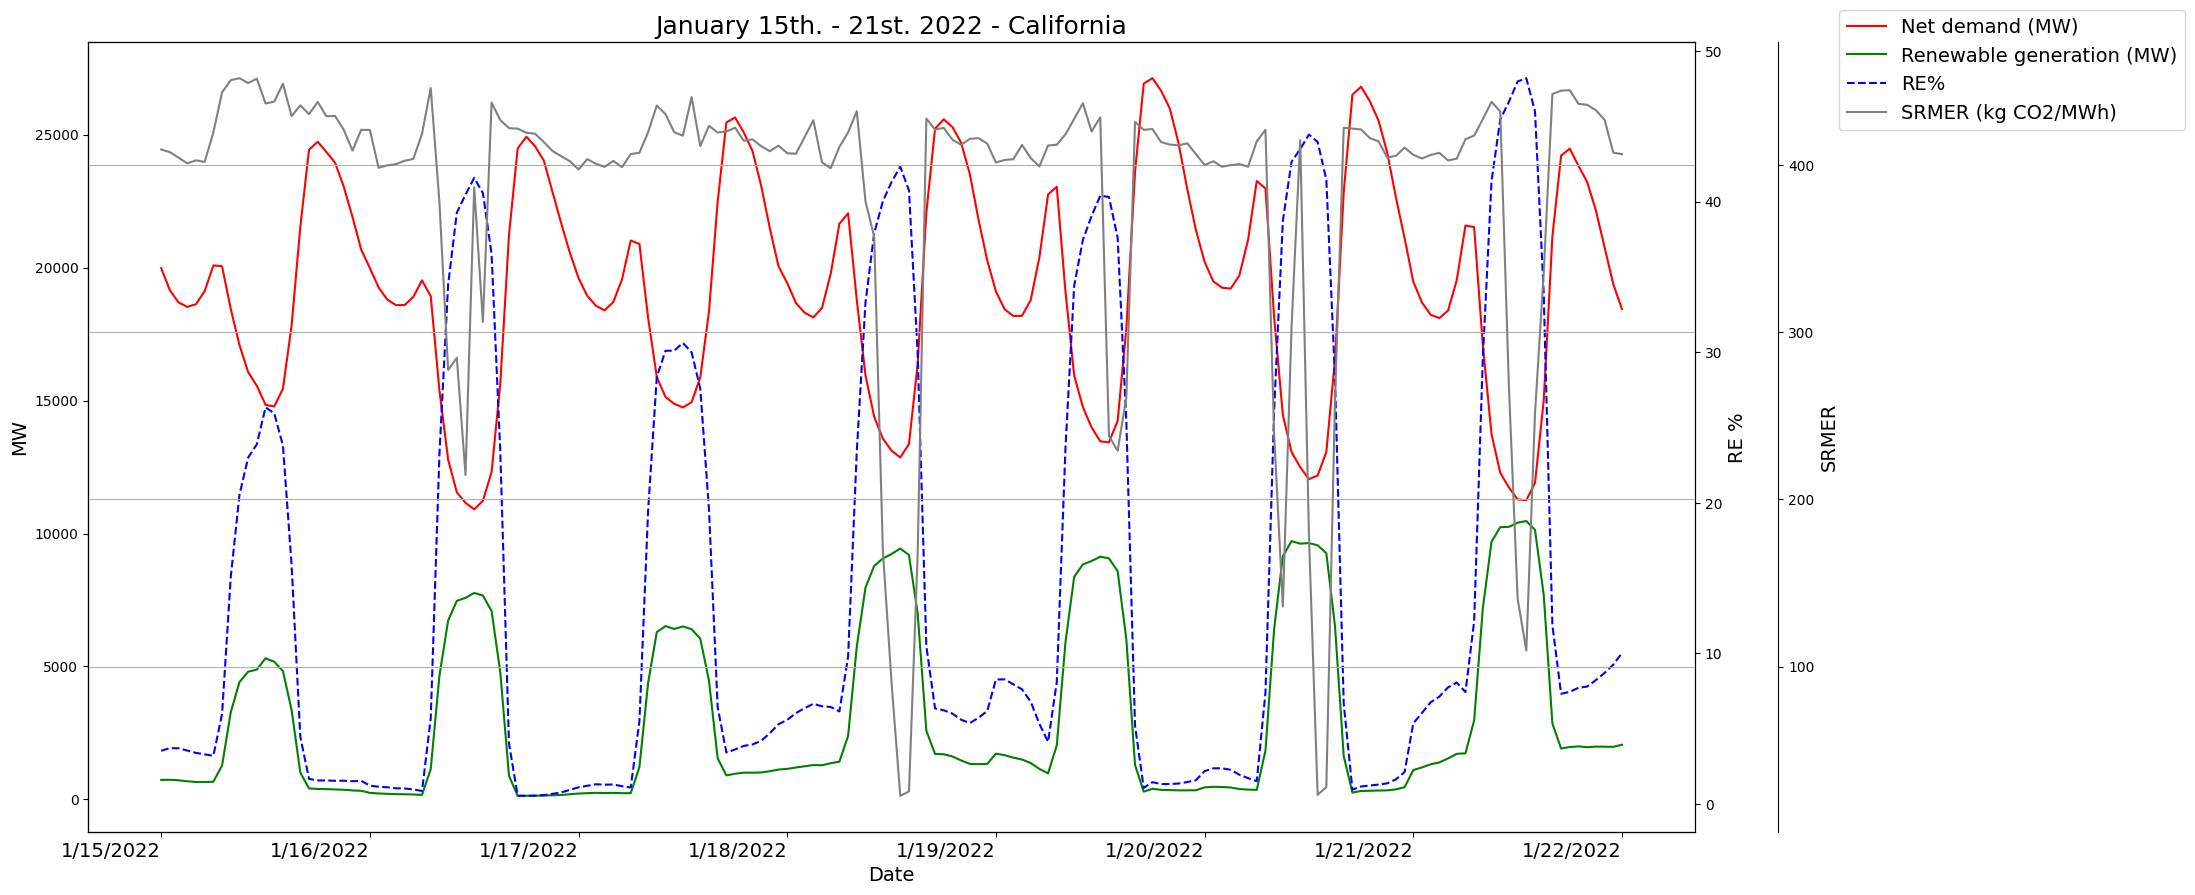

In [15]:
import matplotlib.pyplot as plt



fig, ax1 = plt.subplots(figsize=(20, 9))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Move the third y-axis to the right
ax3.spines['right'].set_position(('outward', 60))

y1 = df.iloc[:, 3]
y2 = df.iloc[:, 2]
y3 = df.iloc[:, 4]
y4 = df.iloc[:, 5]
x = df['Datetime']

plt.title('January 15th. - 21st. 2022 - California',color='black', fontsize=18)
ax1.plot(x, y1, label = "Net demand (MW)", color = 'r' )
ax1.plot(x, y2, label = "Renewable generation (MW)", color = 'g')
ax2.plot(x, y3, label = "RE%",color = 'b',linestyle = 'dashed')
ax3.plot(x, y4, label="SRMER (kg CO2/MWh)", color='gray')  # Adjust color and linestyle as needed

ax1.set_ylabel("MW", color='black', fontsize=14)
ax2.set_ylabel("RE %", color='black', fontsize=14)
ax3.set_ylabel("SRMER", color='black', fontsize=14)  # Provide appropriate units


ax1.set_xlabel("Date", color='black', fontsize=14)

# Set custom x-ticks at every 24 points (once per day)
x_ticks = range(0, len(x), 24)  # Adjust the range based on your data density
x_tick_labels = [x[i].split()[0] for i in x_ticks]  # Extract corresponding date labels

# Rotate the x-tick labels for ax1
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels, fontsize=14, ha='right')

fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=14)

# Display the chart
plt.grid(True)
plt.tight_layout()

# Adjust the figure layout to accommodate the legend
plt.subplots_adjust(right=0.85)  # You can adjust the value as needed


plt.show()

fig.savefig('Cal Jan 2022')

In [ ]:
# Example to handle missing and non-numeric values
df['Net demand'] = df['Net demand'].fillna(0)  # Replace NaN with 0
df['Net demand'] = pd.to_numeric(df['Net demand'], errors='coerce')  # Convert to numeric, replacing errors with NaN


In [ ]:
# Find the minimum value in column 'Net Demand'
min_value = df['Net demand'].idxmin()
print (min_value)

In [ ]:
# Find the minimum value in column 'RE'
min_value = df['RE'].idxmin()
print (min_value)